# Customer Churn 
#### Customer churn refers to the rate at which customers stop doing business with a company over a given period. It is a key metric for businesses, as high churn can indicate unsatistified customers, better competitor offerings, or ineffective retention strategies. In addition, we can identify the specific groups that may need extra marketing/retention efforts. 
#### Usually, customers who churn from one company will start doing business with their competitors. If you aren't happy with the current product you're being provided, in this case a mobile service provider, you are likely to switch to an alternative
#### Churning doesn't happen suddenly either. If you are experiencing low network bandwith, you are likely to tolerate it for a little bit. During this time, a customer would probably try to reach out to customer support, check your network speed, and leave a negative review.
#### If we can collect this data and notice a trend of behaviors of customers who churn, then we can attempt to cater towards their needs in the best way possible. Specifically providing a customer with a good user expereince or special promotion to prevent them from leaving. 
#### By Pulling from the Teleco Customer Churn dataset on kaggle, we can perform our analyis in building a customer churn model using two dfiferent methods - logistic regression and random forest.

# Step 1: Pre-Requisites for Building a Churn Prediction Model

#### First we make sure all the necessary libraries are installed in order to run the analysis - pandas, Matplotlib, Seaborn, Scikit-Learn, and Imblearn. 

In [2]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandasql as ps
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Step 2: Reviewing the Dataset

#### Let's load in the data with the pandas library and look at its head. The file is renamed to 'Customer_Churn.csv', and will be referred to by this name below

In [4]:
df = pd.read_csv('Customer_Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### We see the dataframe has 21 columns that are related to telecome user subscription behavior

#### Let's also list the variables out in order to take a closer look at them

In [5]:
ps.sqldf("select * from df")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Of the 21 variables, we have 
#### **Customer_ID**: Every customer's unique ID
#### **Gender**: The customer's gender
#### **Senior Citizen**: If the customer is over the age of 65
#### **Partner**: If the customer is married 
#### **Dependents**: If the customer has any dependents 
#### **Tenure**: Number of months a customer has been active
#### **PhoneService**: Whether or not the customer has phone serivce
#### **MultipleLines**: Whether the customer had multiple phone lines
#### **InternetService**: Customer's internet provider
#### **OnlineSecurity**: Whether the customer has online backup or not
#### **DeviceProtection**: Whether the customer has device protection or not
#### **TechSupport**: Whether the customer had tech support
#### **StreamingTV**: Whether the customer has streaming tv
#### **Contract**: Contract term of a customer
#### **PaperlessBilling**: Whether the customer has paperless billing
#### **PaymentMethod**: The customer's payment method
#### **MonthlyCharges**: Amount charged to the customer monthly
#### **TotalCharges**: Total amoutn charged to the customer
#### **Churn**: Whether or not the customer churned 

#### Each user within the data has their own unique customer ID. There are also 19 independent variables that are used to predict customer churn. This dataset describes customer churn as users who have left within the last month

#### We can count the number of customers who have been churned in the dataset

In [7]:
ps.sqldf("select count(*) AS churn from df group by churn")

,churn
0,5174
1,1869


#### Around 27% of customers have been churned. This means there is an imbalanced classification. When the distribution of the classes is skewed (in our case there being more customers who haven't churned). This imbalance can lead to more biased models that favor the majority, making it harder to predict the minority class, We can create a balanced training dataset and then build the model

#### We can also count how many months most customers were on tenured for 

In [6]:
ps.sqldf("select count(*) AS churn from df group by tenure")

,churn
0,11
1,613
2,238
3,200
4,176
...,...
68,100
69,95
70,119
71,170


# Step 3: Exploratory Data Analysis for Customer Churn Prediction
#### Now, let's chart the demopgrahich data points and their relationship with customer churn

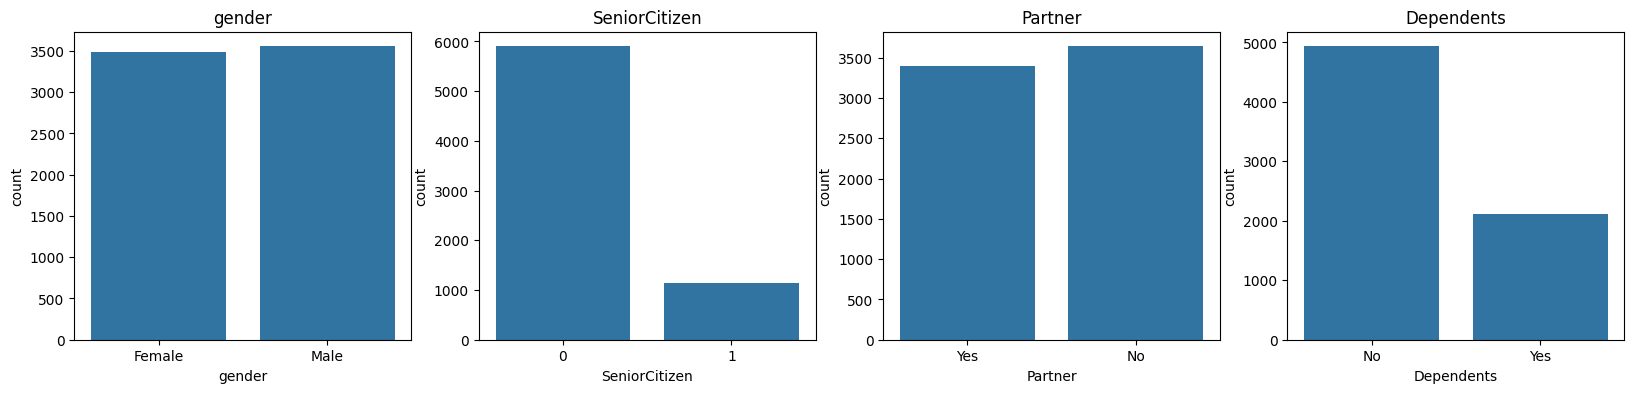

In [8]:
cols = ['gender','SeniorCitizen',"Partner","Dependents"]
numerical = cols

plt.figure(figsize=(20,4))

for i, col in enumerate(numerical):
    ax = plt.subplot(1, len(numerical), i+1)
    sns.countplot(x=str(col), data=df)
    ax.set_title(f"{col}")

#### Many customers in this dataset are younger individuals without a dependent. There is an equal disribution of user, gender, and marital status. 

#### Now, let's look into the relationship between cost and customer churn. In reality, users tend to unsubscribe to their mobile service provider and switch to a different brand if they feel the monthly subscription cost is too high. We can check if that behavior is reflected in our dataset. 

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

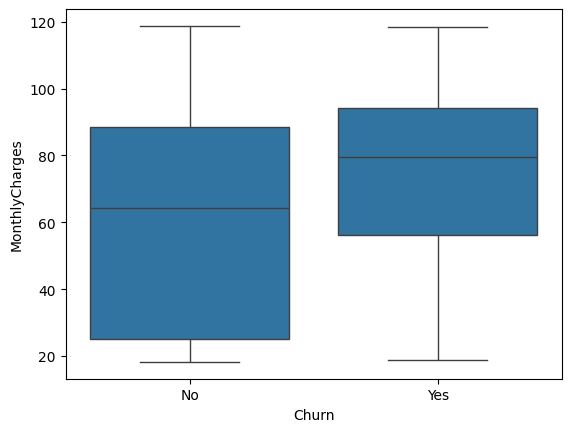

In [9]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)


#### What we assumed before is true. Customers who churned have a higher median monthly charge than those who renewed their subsription
#### Lastly, let's analyze the relationship between customer churn and some other categorical variables in this dataset

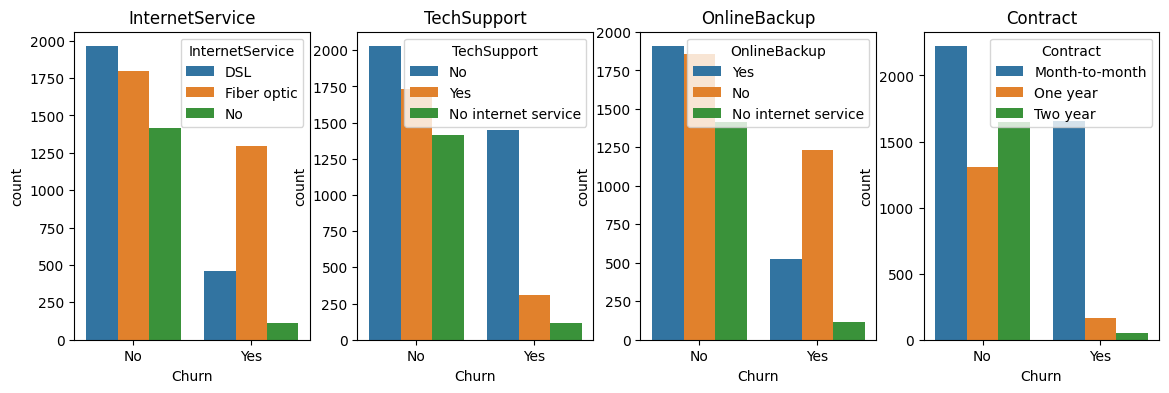

In [10]:
cols = ['InternetService',"TechSupport","OnlineBackup","Contract"]

plt.figure(figsize=(14,4))

for i, col in enumerate(cols):
    ax = plt.subplot(1, len(cols), i+1)
    sns.countplot(x ="Churn", hue = str(col), data = df)
    ax.set_title(f"{col}")

#### We can look at each variable in more detail 
#### 1. **InternetService**: We see above that the customer who use fiber optic Internet churn more often than the others. It is possible that fiber Internet is a more expensive service, so the users could potentially not want to renew.
#### 2. **TechSupport**: Many users who churned did not sign up for tech support. This means they may have not received any assistance on fixing their technical issues and therefore decided not to renew their subscription
#### 3. **OnlineBackup**: A lot of customers who did churn didn't sign up for the online backup service for data storage 
#### 4. **Contract**: Users who churned were almost always on a monthly contract. It adds up, since the customers pay for the service on a monthly basis and can cancel before the next payment is due

# Step 4: Preprocessing Data for Customer Churn
#### Let's do some data preparation before creating the machine learning model. First we'll look at the dataset summary again. We see that the variable 'TotalCharges' has a data type of "object" instead of being a numeric column, so we will convert it into one. 

In [11]:
df['TotalCharges'] = df['TotalCharges'].apply(lambda x: pd.to_numeric(x, errors='coerce')).dropna()

### **Encoding Categorical Variables**
#### The categorical variables need to be converted to a numeric format before we can start using them in the machine learning model. We first can isolate all the cateogrical variables 

In [12]:
cat_features = df.drop(['customerID','TotalCharges','MonthlyCharges','SeniorCitizen','tenure'],axis=1)

cat_features.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


#### Now, let's look at the dataset after encoding the categorical variables 

In [13]:
le = preprocessing.LabelEncoder()
df_cat = cat_features.apply(le.fit_transform)
df_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


#### All the categorical values in the dataset have been replaced with numbers. 
#### Now, we can merge the below code to merge the dataframe we just created with the previous one

In [14]:
num_features = df[['customerID','TotalCharges','MonthlyCharges','SeniorCitizen','tenure']]
finaldf = pd.merge(num_features, df_cat, left_index=True, right_index=True)

### **Oversampling** 
#### As mentioned above, the dataset has a majority of values in the target variable belonging to a single class. only 27% of customers churned
#### This can lead to our machine learning model unerprdoming. In this case, while the model may be accurate (being correct in 73% of the time) it is not valuable since it always predicts a single outcome

#### We are going to oversample the minority class until the data points in that class are equal to that of the majority class
#### First we will do a training-test split. We'll oversample on the training dataset, as the test dataset must be representative of the true population. 

In [15]:
finaldf = finaldf.dropna()
finaldf = finaldf.drop(['customerID'],axis=1)

X = finaldf.drop(['Churn'],axis=1)
y = finaldf['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Now we oversample the training dataset using the SMOTE function. This is able to help model performance by preventing overfitting and ensuring better class balance without just duplicating the existing data that we already have to fit the match. 

In [18]:
oversample = SMOTE(k_neighbors=5)
X_smote, y_smote = oversample.fit_resample(X_train, y_train)
X_train, y_train = X_smote, y_smote

#### Let's also make sure the number of samples in each  class to ensure that they are equal

In [19]:
y_train.value_counts()

Churn
0    3452
1    3452
Name: count, dtype: int64

#### There is 3,452 values in each class, meaning the training dataset is balanced 

# Step 5: Building the Customer Churn Prediction Model
#### We will now build a random forest model to predict customer churn

In [20]:
rf = RandomForestClassifier(random_state=46)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=46)

In [22]:
#Logistic Regression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.783226723525231


/usr/local/Cellar/jupyterlab/4.3.4_1/libexec/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
#Logistic Regression using link

logreg = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=1000)

# Step 3: training the model
logreg.fit(X_train, y_train)

# Step 4: predicting
y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Accuracy:', round(accuracy, 4))
print('Precision:', round(precision, 4))
print('Recall:', round(recall, 4))

Accuracy: 0.7976
Precision: 0.6438
Recall: 0.5348


/usr/local/Cellar/jupyterlab/4.3.4_1/libexec/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### The accuracy of our model is 79.8%, meaning that around 80% of the time the predictions made by the model on the test data are correct
#### Precision is 64.4%, showing that when the model predicts a customer will churn, it is correct 64.4% of the time
#### Lastly, recall is 53.4%, indicating that the model correctly identifies 53.4% of all actual churners

#### With this model, we can not only predict but allocate resources directed towards  customers who are more likely to churn. For example, if a customer is on a month to month contract, we could focus on providing additional incentives such as an online backup service or a Tech Support check in to make sure we can catch a period before they have decided to churn

# Step 6: Customer Churn
#### We can evaluate the model predictions on the test dataset

In [ ]:
preds = rf.predict(X_test)
print(accuracy_score(preds,y_test))

0.7703576044808272


#### Our model is performing nicely, and has an accuracy of 0.78 on the test dataset

#### We see compared to our logistic regression, the random forest produces a model that has a similar accuracy score , albeit a little lower. Despite them being close, we would still want to more forward with te logistic regresstion due to not only its higher accuracy, but also its computational efficiency. Whereas the random forest could require more power due to it's multiple decision trees, the logsistic regression model is more inexpensive. 